# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.129983e+01     7.457253e+00
 * time: 0.0047130584716796875
     1     2.911154e+01     4.248766e+00
 * time: 0.014042139053344727
     2     2.047870e+01     3.627919e+00
 * time: 0.035923004150390625
     3     1.388447e+01     1.262169e+00
 * time: 0.06481409072875977
     4     1.296567e+01     1.950625e+00
 * time: 0.19126510620117188
     5     1.235283e+01     1.227010e+00
 * time: 0.20909810066223145
     6     1.144628e+01     1.977610e+00
 * time: 0.22693705558776855
     7     1.116641e+01     1.610768e+00
 * time: 0.2444460391998291
     8     1.043631e+01     1.256143e+00
 * time: 0.26251220703125
     9     9.936906e+00     1.026609e+00
 * time: 0.28113222122192383
    10     9.646581e+00     6.565728e-01
 * time: 0.30052900314331055
    11     9.483168e+00     6.639537e-01
 * time: 0.3191080093383789
    12     9.439943e+00     1.099047e+00
 * time: 0.3321831226348877
    13     9.382816e+00     5.841027e-01
 * time: 0

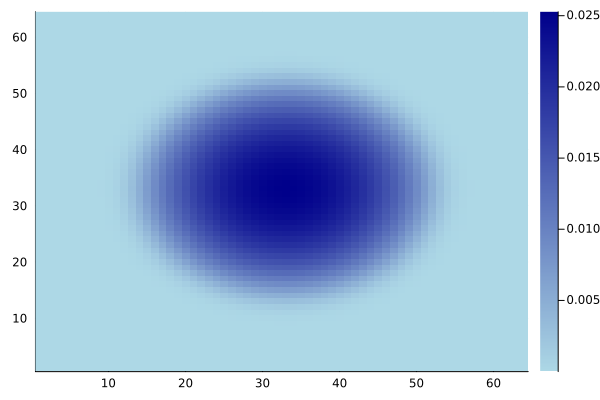

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)